---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [ ]:
# Running on laptop you need to load the csv files created below.
# Remember that networkx 2.0 doesn't support the pickle files created by Mich U's use of networkx 1.0 
# Networkx 2 is not backwards compatible with Networkx 1 pickle files

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

In [3]:
def degree_distribution(G):
    degrees = G.degree()
    degree_values = sorted(set(degrees.values()))
    histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes( G)) for i in degree_values]
    return histogram

In [4]:
#nx.info(P1_Graphs[0]) # barabasi_albert_graph is a Pref Attachment Graph

In [5]:
#nx.info(P1_Graphs[1]) # watts_strogatz_graph is a small world graph. This has low rewiring prob

In [6]:
#nx.info(P1_Graphs[2]) # watts_strogatz_graph is a small world graph. This has low rewiring prob

In [7]:
#nx.info(P1_Graphs[3]) # barabasi_albert_graph is a Pref Attachment Graph

In [8]:
#nx.info(P1_Graphs[4])  # watts_strogatz_graph is a small world graph. This has high rewiring prob

In [9]:
#foo = nx.info(P1_Graphs[1]).split()[1]

In [4]:
#foo

In [18]:
#s[s.find("(")+1:s.find(")")]
#import re

#s = "alpha.Customer[cus_Y4o9qMEZAugtnW] ..."
#m = re.search(r"\[([A-Za-z0-9_]+)\]", s)
#m = re.search(r"\[(\w+)\]", s)
#print m.group(1)

In [5]:
#import re
#re.findall("([A-Za-z0-9_.]+)", foo)

In [6]:
#import re
#import numpy as np
#res = []
#for i in np.arange(len(P1_Graphs)):
#    g = nx.info(P1_Graphs[i]).split()
#    if 'watts' in g[1]: # Small world
#        m = re.findall("([A-Za-z0-9_.]+)", g[1])
#        if np.float(m[3]) < 1:
#            res.append('SW_L')
#        else:
#            res.append('SW_H')
#    elif 'barabasi' in g[1]: # Pref Attach
#        res.append('PA')
#

In [7]:
#res

In [8]:
#import numpy as np
#for i in np.arange(len(P1_Graphs)):
#    print(P1_Graphs[i])

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [29]:
def jpg_graph_identification():
    import re
    import numpy as np
    res = []
    for i in np.arange(len(P1_Graphs)):
        g = nx.info(P1_Graphs[i]).split()
        if 'watts' in g[1]: # Small world
            m = re.findall("([A-Za-z0-9_.]+)", g[1])
            if np.float(m[3]) < 1:
                res.append('SW_L')
            else:
                res.append('SW_H')
        elif 'barabasi' in g[1]: # Pref Attach
            res.append('PA')
    return(res)

In [30]:
jpg_graph_identification()

['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

In [6]:
def mp_graph_identification():
    methods = []
    for G in P1_Graphs:
        clustering = nx.average_clustering(G)
        shortest_path = nx.average_shortest_path_length(G)
        degree_hist = degree_distribution(G)
        if len(degree_hist)>10:
            methods.append('PA')
        elif clustering < 0.1:
            methods.append('SW_H')
        else:
            methods.append('SW_L')
    return methods
#graph_identification()

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [31]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
df = pd.DataFrame(index=G.nodes())
df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
df['ManagementSalary'] = pd.Series(pd.Series(nx.get_node_attributes(G, 'ManagementSalary')))
df['degree'] = pd.Series(pd.Series(G.degree()))
df['deg_cent'] = pd.Series(nx.degree_centrality(G))
df['close_cent'] = pd.Series(nx.closeness_centrality(G, normalized=True))
df['between_cent'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
df['page_rank'] = pd.Series(nx.pagerank(G))
hubs = nx.hits(G, normalized=True)[0]
auth = nx.hits(G, normalized=True)[1]
df['hubs'] = pd.Series(hubs)
df['auth'] = pd.Series(auth)
df_holdout = df[df['ManagementSalary'].isnull()]
df_filtered = df[df['ManagementSalary'].notnull()]

In [27]:
# Running on laptop you can load from here. 
# Remember that networkx 2.0 doesn't support the pickle files created by Mich U's use of networkx 1.0 
# Networkx 2 is not backwards compatible with Networkx 1 pickle files
#df.to_csv('assignment4_2a.csv')

In [33]:
X_holdout = df_holdout.drop(labels='ManagementSalary', axis=1)

In [34]:
X_holdout.head()

,Department,degree,deg_cent,close_cent,between_cent,page_rank,hubs,auth
1,1,52,0.051793,0.422360,0.001195,0.001426,0.001472,0.001472
2,21,95,0.094622,0.461490,0.006570,0.002605,0.002680,0.002680
5,25,171,0.170319,0.501484,0.030995,0.004914,0.004011,0.004011
8,14,37,0.036853,0.413151,0.000557,0.001059,0.000791,0.000791
14,4,80,0.079681,0.442068,0.003726,0.002166,0.001856,0.001856


In [35]:
X = df_filtered.drop(labels='ManagementSalary',axis=1)
y = df_filtered['ManagementSalary']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
lr = LogisticRegression(C=100, penalty='l1')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[211   4]
 [ 16  18]]
             precision    recall  f1-score   support

        0.0       0.93      0.98      0.95       215
        1.0       0.82      0.53      0.64        34

avg / total       0.91      0.92      0.91       249



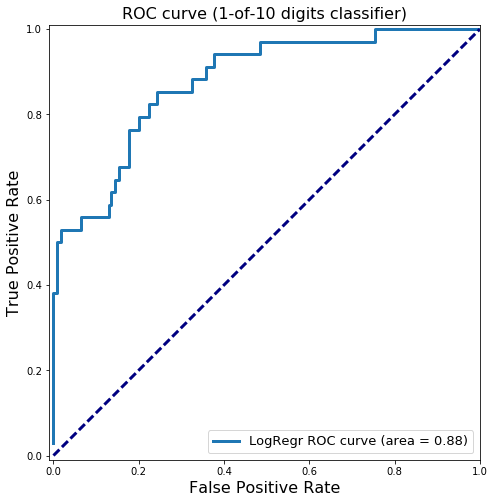

In [38]:
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(10,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [39]:
len(lr.predict_proba(X_holdout)[0:,1])

252

In [40]:
lr = LogisticRegression()
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,1000], 'penalty':['l1','l2']}
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
grid.best_params_

{'C': 100, 'penalty': 'l1'}

In [43]:
svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

[[203  12]
 [ 34   0]]
             precision    recall  f1-score   support

        0.0       0.86      0.94      0.90       215
        1.0       0.00      0.00      0.00        34

avg / total       0.74      0.82      0.78       249



In [44]:
param_grid = {'C':[0.01,0.1,1,10,100,1000], 
              'gamma':[10,1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=0, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [46]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
grid_predictions = grid.predict(X_test)

In [48]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[209   6]
 [ 19  15]]
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.94       215
        1.0       0.71      0.44      0.55        34

avg / total       0.89      0.90      0.89       249



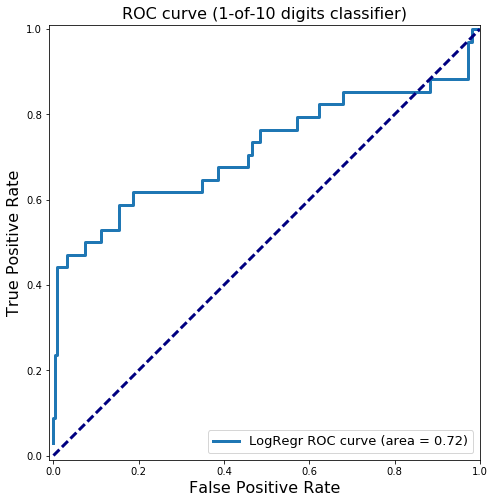

In [49]:
y_score_grid = grid.fit(X_train, y_train).decision_function(X_test)
fpr_grid, tpr_grid, _ = roc_curve(y_test, y_score_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)
plt.figure(figsize=(10,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_grid, tpr_grid, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_grid))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [50]:
clf = MLPClassifier(hidden_layer_sizes = [100, 50, 10], alpha = 5,
                       random_state = 0, solver='lbfgs', verbose=1)
clf.fit(X_train, y_train)
mlp_predictions = clf.predict(X_test)
test_proba = clf.predict_proba(X_holdout)[:, 1]
print(confusion_matrix(y_test, mlp_predictions))
print(classification_report(y_test, mlp_predictions))

[[210   5]
 [ 19  15]]
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95       215
        1.0       0.75      0.44      0.56        34

avg / total       0.89      0.90      0.89       249



In [64]:
#G.nodes(data=True)

### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [35]:
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import MinMaxScaler
#def salary_predictions():
#    def is_management(node):
#        managementSalary = node[1]['ManagementSalary']
#        if managementSalary == 0:
#            return 0
#        elif managementSalary == 1:
#            return 1
#        else:
#            return None
#
#    df = pd.DataFrame(index=G.nodes())
#    df['clustering'] = pd.Series(nx.clustering(G))
#    df['degree'] = pd.Series(G.degree())
#    df['degree_centrality'] = pd.Series(nx.degree_centrality(G))
#    df['closeness'] = pd.Series(nx.closeness_centrality(G, normalized=True))
#    df['betweeness'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
#    df['pr'] = pd.Series(nx.pagerank(G))
#    df['is_management'] = pd.Series([is_management(node) for node in G.nodes(data=True)])
#    df_train = df[~pd.isnull(df['is_management'])]
#    df_test = df[pd.isnull(df['is_management'])]
#    features = ['clustering', 'degree', 'degree_centrality', 'closeness', 'betweeness', 'pr']
#    X_train = df_train[features]
#    Y_train = df_train['is_management']
#    X_test = df_test[features]
#    scaler = MinMaxScaler()
#    X_train_scaled = scaler.fit_transform(X_train)
#    X_test_scaled = scaler.transform(X_test)
#    clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5,
#                       random_state = 0, solver='lbfgs', verbose=0)
#    clf.fit(X_train_scaled, Y_train)
#    mlp_predictions = clf.predict(X_test)
#    test_proba = clf.predict_proba(X_test_scaled)[:, 1]
#    print(confusion_matrix(y_test, mlp_predictions))
#    print(classification_report(y_test, mlp_predictions))
#    return pd.Series(test_proba,X_test.index)
#prediction = salary_predictions()

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [51]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.shape

(488446, 1)

In [81]:
#future_connections[future_connections['Future Connection'].isnull()]

In [52]:
future_connections.head()

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0


In [84]:
#G.edges()

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [53]:
for node in G.nodes():
    G.node[node]['community'] = G.node[node]['Department']

In [54]:
preferential_attachment = list(nx.preferential_attachment(G))
df = pd.DataFrame(index=[(x[0], x[1]) for x in preferential_attachment])
df['preferential_attachment'] = [x[2] for x in preferential_attachment]

In [55]:
jaccard = list(nx.jaccard_coefficient(G))
df_jaccard = pd.DataFrame(index=[(x[0],x[1]) for x in jaccard])
df_jaccard['jaccard_coef'] = [x[2] for x in jaccard]

In [56]:
cn_soundarajan_hopcroft = list(nx.cn_soundarajan_hopcroft(G))
df_cn_soundarajan_hopcroft = pd.DataFrame(index=[(x[0], x[1]) for x in cn_soundarajan_hopcroft])
df_cn_soundarajan_hopcroft['cn_soundarajan_hopcroft'] = [x[2] for x in cn_soundarajan_hopcroft]

In [57]:
resource_alloc = list(nx.resource_allocation_index(G))
df_resource_alloc = pd.DataFrame(index=[(x[0],x[1]) for x in resource_alloc])
df_resource_alloc['resource_alloc'] = [x[2] for x in cn_soundarajan_hopcroft]

In [58]:
adamic_adar = list(nx.adamic_adar_index(G))
df_adamic_adar = pd.DataFrame(index=[(x[0],x[1]) for x in adamic_adar])
df_adamic_adar['adamic_adar'] = [x[2] for x in adamic_adar]

In [59]:
df = df.join(df_jaccard,how='outer')
df = df.join(df_cn_soundarajan_hopcroft,how='outer')
df = df.join(df_resource_alloc,how='outer')
df = df.join(df_adamic_adar,how='outer')

In [60]:
df = future_connections.join(df,how='outer')

In [14]:
# Running on laptop you can load from here. 
# Remember that networkx 2.0 doesn't support the pickle files created by Mich U's use of networkx 1.0 
# Networkx 2 is not backwards compatible with Networkx 1 pickle files
#df.to_csv('assignment4_2b.csv')
df = pd.read_csv('assignment4_2b.csv')

In [15]:
df.rename(columns={'Unnamed: 0': "edge"}, inplace=True)

In [16]:
df.set_index(keys='edge', inplace=True)

In [17]:
X_unseen = df[df['Future Connection'].isnull()].copy()

In [18]:
X_unseen.drop(labels='Future Connection', axis=1, inplace=True)

In [19]:
X_unseen.head()

,preferential_attachment,jaccard_coef,cn_soundarajan_hopcroft,resource_alloc,adamic_adar
edge,,,,,
"(0, 9)",1760,0.025000,2,2,0.510499
"(0, 19)",3168,0.036364,4,4,0.952749
"(0, 20)",3256,0.064220,7,7,1.597693
"(0, 35)",2596,0.010000,1,1,0.194490
"(0, 38)",2068,0.000000,0,0,0.000000


In [20]:
df = df[df['Future Connection'].notnull()]

In [21]:
X = df.drop(labels='Future Connection', axis=1)
y = df['Future Connection']

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
lr = LogisticRegression()
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,1000], 'penalty':['l1','l2']}
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[110372    930]
 [  3616   5973]]
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98    111302
        1.0       0.87      0.62      0.72      9589

avg / total       0.96      0.96      0.96    120891



In [36]:
grid.predict_proba(X_unseen)[:,1]

array([0.02435101, 0.05657095, 0.24472969, ..., 0.01116863, 0.01116863,
       0.01116226])

/usr/local/Cellar/python3/3.6.4_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


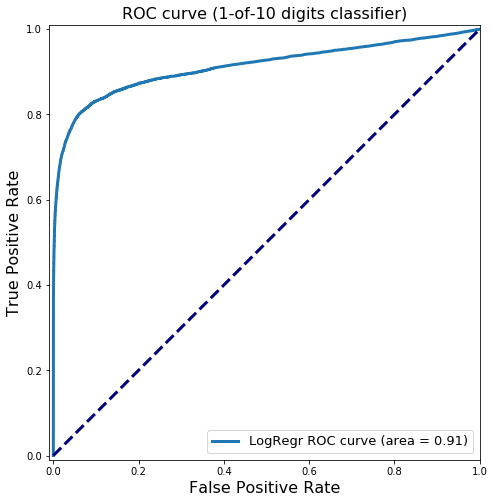

In [37]:
y_score_grid = grid.fit(X_train, y_train).decision_function(X_test)
fpr_grid, tpr_grid, _ = roc_curve(y_test, y_score_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)
plt.figure(figsize=(10,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_grid, tpr_grid, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_grid))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [38]:
# MaxPoon Solution below

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
def new_connections_predictions():
    for node in G.nodes():
        G.node[node]['community'] = G.node[node]['Department']
    preferential_attachment = list(nx.preferential_attachment(G))
    df = pd.DataFrame(index=[(x[0], x[1]) for x in preferential_attachment])
    df['preferential_attachment'] = [x[2] for x in preferential_attachment]
    cn_soundarajan_hopcroft = list(nx.cn_soundarajan_hopcroft(G))
    df_cn_soundarajan_hopcroft = pd.DataFrame(index=[(x[0], x[1]) for x in cn_soundarajan_hopcroft])
    df_cn_soundarajan_hopcroft['cn_soundarajan_hopcroft'] = [x[2] for x in cn_soundarajan_hopcroft]
    df = df.join(df_cn_soundarajan_hopcroft,how='outer')
    df['cn_soundarajan_hopcroft'] = df['cn_soundarajan_hopcroft'].fillna(value=0)
    df['resource_allocation_index'] = [x[2] for x in list(nx.resource_allocation_index(G))]
    df['jaccard_coefficient'] = [x[2] for x in list(nx.jaccard_coefficient(G))]
    df = future_connections.join(df,how='outer')
    df_train = df[~pd.isnull(df['Future Connection'])]
    df_test = df[pd.isnull(df['Future Connection'])]
    features = ['cn_soundarajan_hopcroft', 'preferential_attachment', 'resource_allocation_index', 'jaccard_coefficient']
    X_train = df_train[features]
    Y_train = df_train['Future Connection']
    X_test = df_test[features]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5,
                       random_state = 0, solver='lbfgs', verbose=0)
    clf.fit(X_train_scaled, Y_train)
    test_proba = clf.predict_proba(X_test_scaled)[:, 1]
    predictions = pd.Series(test_proba,X_test.index)
    target = future_connections[pd.isnull(future_connections['Future Connection'])]
    target['prob'] = [predictions[x] for x in target.index]
    return target['prob']
# new_connections_predictions()